## Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

* построить не менее 4 визуализаций различных видов;
* каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
* по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

## Дополнительная часть (необязательная)
построить дополнительно не менее 2 визуализаций (итого не менее 6);
в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [3]:
df = pd.read_csv('C:\\Users\\HP\\Desktop\\DataAnalitics\\Python\\Notebook\\statistics\\files\\googleplaystore.csv', sep=',')

In [4]:
# датафрейм приложения магазина Google Play.
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# видим, что столбцах Reviews и Installs вместо чисел - тип данных object.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
# в столбце Reviews есть одна строка со значением 3.0М, которая не дает нам преобразовать столбец в "инт", удалим ее.
df.drop(df[df['Reviews'].str.contains(r'\d+\.\d+M') == True].index, inplace=True)

In [7]:
# теперь преобразуем тип столбца в числовой
df['Reviews'] = df.Reviews.astype('int64')

In [8]:
# преобразуем столбец Installs в числовой формат, для этого надо удалить плюсы и запятые
df['Installs'] = df['Installs'].astype(str).str.slice(start = 0, stop = -1)

df['Installs'].replace(',', '', regex=True, inplace=True)

df['Installs'] = df['Installs'].apply(pd.to_numeric,errors='coerce')

In [9]:
# теперь данные готовы
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10839 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [10]:
# базовые статистики по датафрейму
df.describe()

,Rating,Reviews,Installs
count,9366.000000,1.084000e+04,1.083900e+04
mean,4.191757,4.441529e+05,1.546577e+07
std,0.515219,2.927761e+06,8.503315e+07
min,1.000000,0.000000e+00,0.000000e+00
25%,4.000000,3.800000e+01,3.000000e+03
50%,4.300000,2.094000e+03,1.000000e+05
75%,4.500000,5.477550e+04,5.000000e+06
max,5.000000,7.815831e+07,1.000000e+09


<AxesSubplot:title={'center':'Rating distribution'}, ylabel='Frequency'>

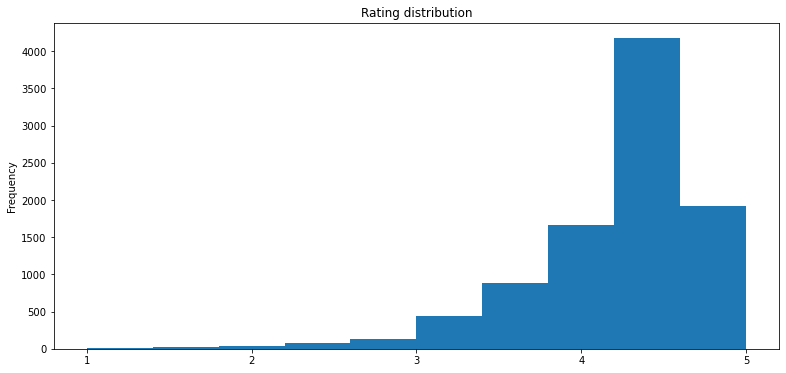

In [11]:
# Гистограмма - распределение рейтинга
df.Rating.plot(kind='hist', 
                   bins=10,
                   title='Rating distribution',
                   xlabel='Rating',
                   ylabel='App',
                   xticks=range(1, 6))

### Выводы:
* Такое частотное распределение показывает, что диапазон значений от 4 до 5 исследуемой переменной Rating встречается наиболее часто, самое популярная оценка рейтинга = примерно 4,5, то есть в целом пользователи приложений Гугл довольны качеством.
* Большинство оценок расположено около  среднего значения, распределение является асимметричным, одномодальным. 

<AxesSubplot:title={'center':'Rating distribution'}>

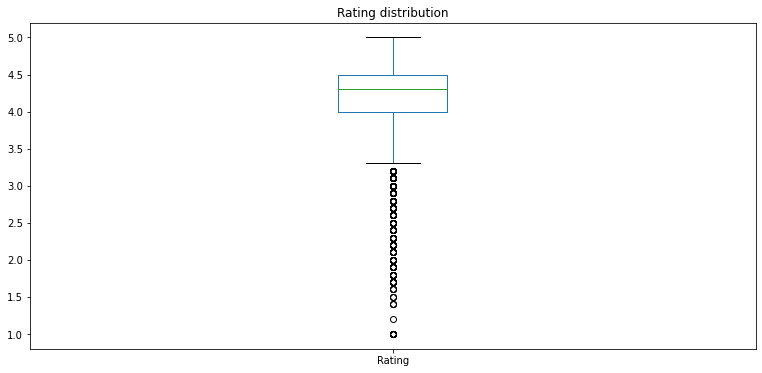

In [12]:
# Ящик с усами - распределение рейтингов
df.Rating.plot(kind='box',
                   title='Rating distribution')

### Выводы:
* На этом графике хорошо видна центральная тенденция  (медиана или  среднее = 4,3), а также размах от 3,3 до 5 и квартили.
* Сразу видим выбросы - редкие значения оценок рейтинга от 1 до 3.

In [13]:
# посчитаем топ-10 категорий по кол-ву установок
app_by_categories = df[['Installs', 'Category']].groupby('Category').sum().sort_values(by='Installs', ascending=False).head(10)
# добавим стилизацию таблицы
app_by_categories.style.bar(align='mid')
app_by_categories

,Installs
Category,
GAME,3.508602e+10
COMMUNICATION,3.264728e+10
PRODUCTIVITY,1.417609e+10
SOCIAL,1.406987e+10
TOOLS,1.145277e+10
FAMILY,1.025826e+10
PHOTOGRAPHY,1.008825e+10
NEWS_AND_MAGAZINES,7.496318e+09
TRAVEL_AND_LOCAL,6.868887e+09


<AxesSubplot:title={'center':'топ-10 категорий по кол-ву установок'}, xlabel='Категории', ylabel='Установки'>

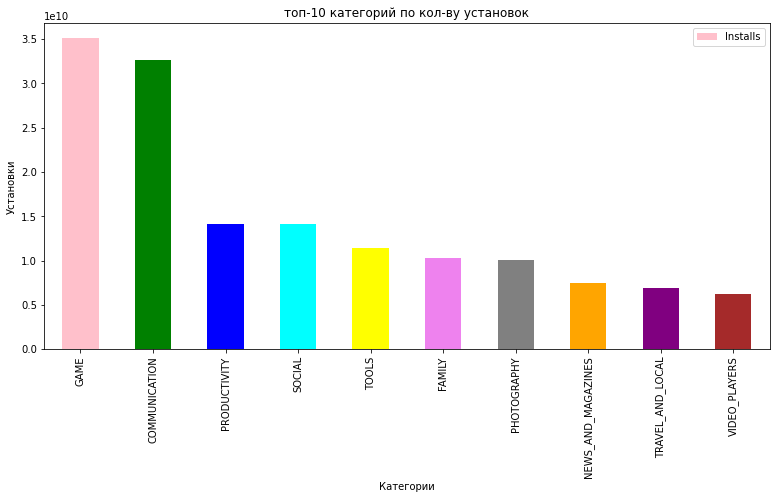

In [14]:
# Столбчатая диаграмма
app_by_categories.plot(kind='bar', 
                       title='топ-10 категорий по кол-ву установок',
                       xlabel='Категории',
                       ylabel='Установки',
                       color=[['pink', 'green', 'blue', 'cyan', 'yellow', 'violet', 'grey', 'orange', 'purple', 'brown']])

### Выводы:
* Видим, что самые скачиваемые приложения - это игры, далее приложения-коммуникаторы, социальные сети и приложения для продуктивности более менее равны и т.д.

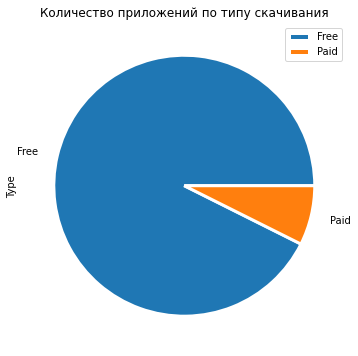

In [15]:
# Круговая диаграмма - количество приложений по типу (бесплатно или нет)
pie_data = df.Type.value_counts().sort_values(ascending = False)
ax = pie_data.plot(kind='pie',
                   title='Количество приложений по типу скачивания',
                   labeldistance=1.15, 
                   wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax.legend()

### Выводы:
* Видим, что подавляющее большинство приложений в магазине Гугл - бесплатные для скачивания. Возможно потом для пользования нужна подписка.

<AxesSubplot:title={'center':'Взаимосвязь между кол-вом просмотров и оценками пользователей'}, xlabel='Rating', ylabel='Reviews'>

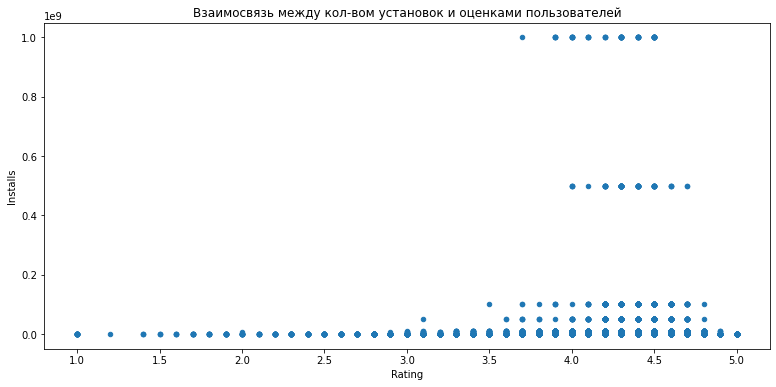

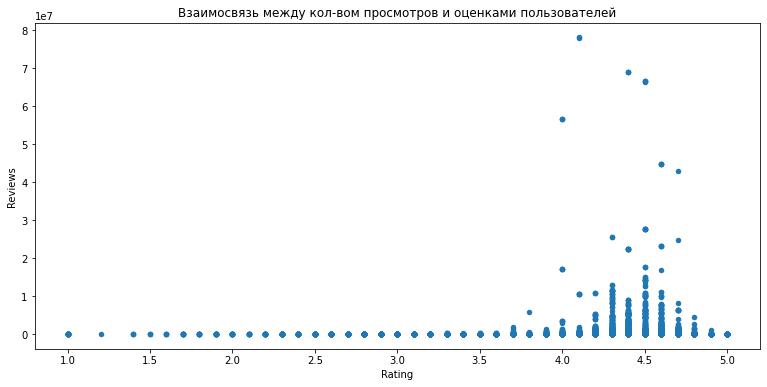

In [16]:
# Точечная диаграмма - посмотрим на взаимосвязь рейтинга и скачиваний, и просмотров
df.plot(kind='scatter', 
        x='Rating', 
        y='Installs', 
        title='Взаимосвязь между кол-вом установок и оценками пользователей')
df.plot(kind='scatter', 
        x='Rating', 
        y='Reviews', 
        title='Взаимосвязь между кол-вом просмотров и оценками пользователей')

### Выводы:
* Из этих графиков, можем предположить сильную зависимость между этими переменными. 
* Так как чаще всего, если пользователь видит высокий рейтинг, то ему интересно посмотреть приложение и возможно даже установить его. И наоборот.

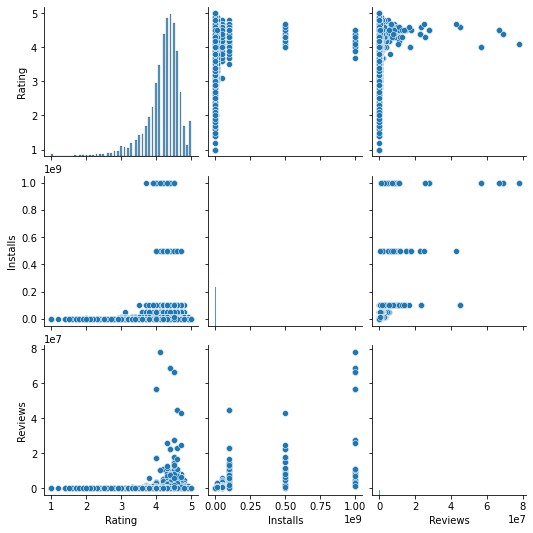

In [17]:
# Pair plot (scatter plot matrix) 
sns.pairplot(df[['Rating', 'Installs', 'Reviews']])

### Выводы: 
* Матричный график поможет нам посмотреть на одной картинке, как связаны между собой просмотры, скачивания и рейтинг в наборе данных. Здесь мы наблюдаем высокий уровень корреляции.

<AxesSubplot:xlabel='Category', ylabel='Rating'>

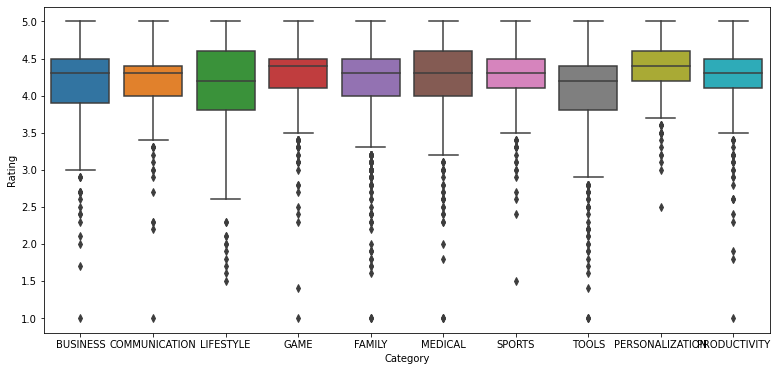

In [19]:
# boxplot для сравнения пользовательских оценок и их выбросов для топ-10 крупнейших категорий приложений
top_category = df.Category.value_counts().sort_values(ascending = False).head(10).index.values
top_category
sns.boxplot(x='Category', y="Rating", 
            data=df[df.Category.isin(top_category)])

In [25]:
# построим сводную таблицу для анализа рейтинга на топ-10 крупнейших категорий в зависимости от возрастной категории пользователей.
df_pivot = df[df.Category.isin(top_category)].pivot_table(
                        index='Content Rating', 
                        columns='Category', 
                        values='Rating', 
                        aggfunc=np.mean).fillna(0)
df_pivot

Category,BUSINESS,COMMUNICATION,FAMILY,GAME,LIFESTYLE,MEDICAL,PERSONALIZATION,PRODUCTIVITY,SPORTS,TOOLS
Content Rating,,,,,,,,,,
Adults only 18+,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.500000,0.000000
Everyone,4.119064,4.140678,4.194157,4.283480,4.073759,4.176276,4.323443,4.212968,4.217091,4.044704
Everyone 10+,0.000000,0.000000,4.238889,4.346923,3.840000,4.387500,4.380000,3.600000,4.333333,0.000000
Mature 17+,0.000000,4.311111,4.193182,4.262162,4.255556,4.466667,4.500000,4.600000,4.285714,3.700000
Teen,4.300000,4.320833,4.157438,4.272531,4.416667,4.533333,4.403571,4.050000,4.140000,4.500000
Unrated,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.100000


<AxesSubplot:xlabel='Category', ylabel='Content Rating'>

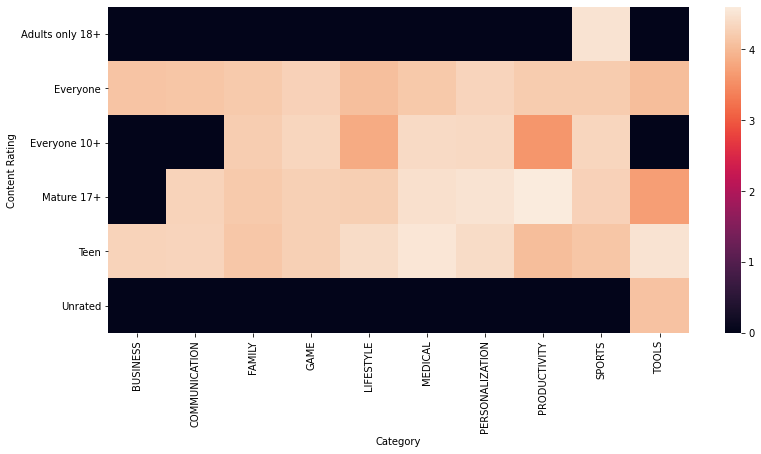

In [26]:
# Heat map
sns.heatmap(df_pivot)

### Выводы: 
* На тепловой карте мы видим, что контент для тинейджеров и для всех - имеет больше всего оценок и они выше среднего. Контент для взрослых 18+ - имеет активность только в категории спорт. Самые высокие средние оценки у категорий: MEDICAL,PERSONALIZATION и PRODUCTIVITY.